In [ ]:
# distribution of length of texts by article
# distribution of length of texts in all

# no. of cases per article
# no. of documents per article


# distribution of cases by year


In [1]:
# Data visualization
import matplotlib.pyplot as plt 

# Data manipulation
import pandas as pd
import numpy as np
import csv
from zipfile import ZipFile

In [2]:
# Webscraping
import glob
import requests
from bs4 import BeautifulSoup
import time
import datetime
from pandas.core.common import flatten
import os
from itertools import chain
from tqdm import tqdm
import json
import urllib.request

In [3]:
# Parsing and pre-processing
from glob import glob
import os 
import re

from pdfminer.high_level import extract_text
import pdfplumber
from langdetect import detect, DetectorFactory

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
df = pd.read_json(r"../../../data/processed/df1_2023_02_28.json")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25122 entries, 0 to 25642
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           25122 non-null  object 
 1   year           22710 non-null  float64
 2   len_pdf        25122 non-null  int64  
 3   article        25122 non-null  object 
 4   article_txt    25122 non-null  object 
 5   article_62     25122 non-null  object 
 6   case_num       25122 non-null  object 
 7   filename       25122 non-null  object 
 8   section_text   25122 non-null  object 
 9   bsn_act        25122 non-null  object 
 10  simp_text      25122 non-null  object 
 11  section        21731 non-null  object 
 12  sec_text       25122 non-null  object 
 13  count          25122 non-null  int64  
 14  file           25122 non-null  object 
 15  id             25122 non-null  int64  
 16  year_text      25050 non-null  float64
 17  article_new    25122 non-null  object 
 18  articl

In [46]:
# no of cases by article_new
df.groupby('article_new')['case_num'].nunique()

article_new
article6(1)(b)    4736
article6(2)        206
article8(1)         29
article8(2)         65
article8(3)          6
referral            57
Name: case_num, dtype: int64

In [47]:
# no of documents by article_new
df.groupby('article_new')['file'].nunique()

article_new
article6(1)(b)    4736
article6(2)        207
article8(1)         29
article8(2)         66
article8(3)          6
referral            62
Name: file, dtype: int64

In [48]:
# no of rows by article
df['article_new'].value_counts().sort_index()

article6(1)(b)    17016
article6(2)        4414
article8(1)         541
article8(2)        2165
article8(3)         413
referral            573
Name: article_new, dtype: int64

In [7]:
# no of cases by year
df.groupby('year_text')['case_num'].nunique()

year_text
2004.0    109
2005.0    241
2006.0    303
2007.0    335
2008.0    256
2009.0    198
2010.0    219
2011.0    268
2012.0    195
2013.0    233
2014.0    255
2015.0    270
2016.0    311
2017.0    267
2018.0    344
2019.0    320
2020.0    307
2021.0    346
2022.0    292
2023.0      6
Name: case_num, dtype: int64

### Distribution of length of texts

<AxesSubplot: >

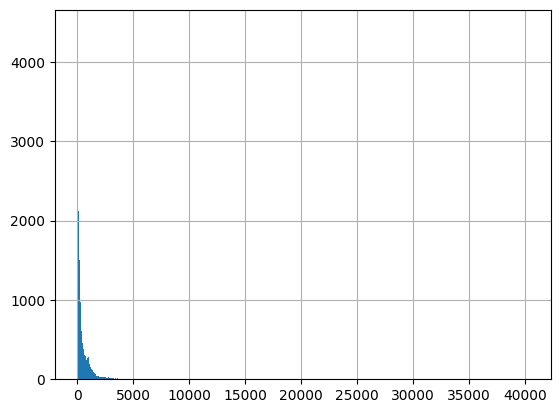

In [8]:
pd.Series(df['count']).hist(bins = 1000)

<AxesSubplot: >

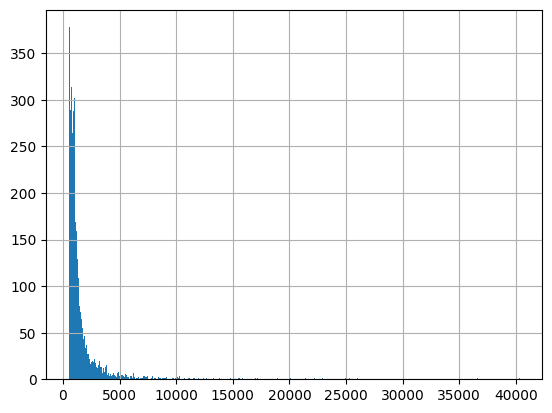

In [9]:
pd.Series(df[df['count']>=500]['count']).hist(bins = 1000)

<AxesSubplot: >

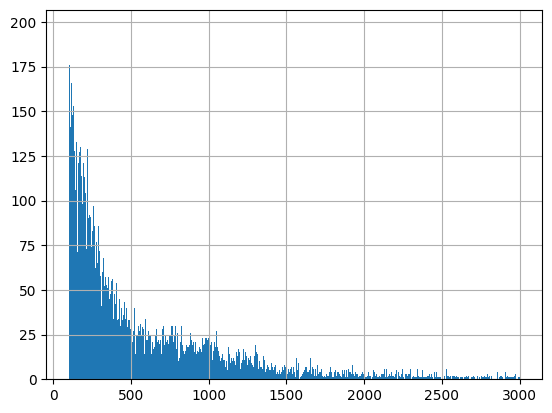

In [10]:
pd.Series(df[(df['count'] >= 100) & (df['count'] <= 3000)]['count']).hist(bins = 1000)

In [11]:
len(df[(df['count'] >= 100) & (df['count'] <= 5000)])


17984

In [45]:
len(df[(df['count'] <= 3000)])

24429

In [ ]:
df[(df['count'] <= 3000)]

In [44]:
len(df[(df['count'] > 3000)])

693

In [50]:
df.groupby('article_new')['case_num'].nunique()

article_new
article6(1)(b)    4736
article6(2)        206
article8(1)         29
article8(2)         65
article8(3)          6
referral            57
Name: case_num, dtype: int64

In [68]:
# no of cases by article_new
df[(df['count'] > 5000)].groupby('article_new')['case_num'].nunique()

article_new
article6(1)(b)    54
article6(2)       43
article8(1)       16
article8(2)       31
article8(3)        2
referral           2
Name: case_num, dtype: int64

In [64]:
df[(df['count'] > 5000)]['sec_text']

101      imports\n5.2.1.  Analytical framework\n(62)  U...
168      Source: Form CO\n(90)  In primary carpet backi...
172      [70- [70- [70- [70-\n80] [70-80]%\n80]%  80]% ...
235      6.3.1.  Introduction\n(135)  A merger giving r...
262      [Confidential information regarding NENT’s bus...
                               ...                        
25006    Source: Aer Lingus454\n(507)  In the analysis ...
25009    (‘000)\nAer Lingus  32565  7,780  73\nRyanair ...
25087    10.3.1.  General description by Ryanair\n(1760...
25128    speed  speed\nkm/h)  km/h)  km/h)  km/h)\nAlst...
25378    competition\n4.3.1.  The BKartA’s submission\n...
Name: sec_text, Length: 275, dtype: object

In [12]:
min(df['count'])

21

In [59]:
max(df['count'])

40322

In [62]:
df[df['count']==max(df['count'])]

,date,year,len_pdf,article,article_txt,article_62,case_num,filename,section_text,bsn_act,simp_text,section,sec_text,count,file,id,year_text,article_new,article_match
21918,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,"[Commitment to divest, (2) To maintain effect...",,None,SECTION B – THE COMMITMENT TO DIVEST AND THE D...,Commitment to divest\n(2) To maintain effecti...,40322,m9517_2719_3,21918,2020.0,article6(2),True


In [63]:
df[df['case_num']=='M.9517']

,date,year,len_pdf,article,article_txt,article_62,case_num,filename,section_text,bsn_act,simp_text,section,sec_text,count,file,id,year_text,article_new,article_match
21911,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,"[In the published version of this decision,, s...",,None,PUBLIC VERSION,"In the published version of this decision,\nso...",53,m9517_2719_3,21911,2020.0,article6(2),True
21912,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,"[1 OJ L 24, 29.1.2004, p. 1 (the ""Merger Reg...",,None,Agreement on the European Economic Area2,"1 OJ L 24, 29.1.2004, p. 1 (the ""Merger Regu...",24915,m9517_2719_3,21912,2020.0,article6(2),True
21913,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,"[TABLE OF CONTENTS, SECTION A – DEFINITIONS .....",,None,17 April 2019,TABLE OF CONTENTS\nSECTION A – DEFINITIONS ......,445,m9517_2719_3,21913,2020.0,article6(2),True
21914,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,[Pursuant to Article 6(2) of Council Reg...,,None,COMMITMENTS TO THE EUROPEAN COMMISSION,Pursuant to Article 6(2) of Council Regu...,266,m9517_2719_3,21914,2020.0,article6(2),True
21915,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,"[and the terms of sale by the Commission., Con...",,None,Divestment Closing Period: the period of […] m...,and the terms of sale by the Commission.\nConf...,248,m9517_2719_3,21915,2020.0,article6(2),True
21916,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,"[development, manufacturing and marketing ...",,None,Pfizer: Pfizer Inc. a pharmaceutical comp...,"development, manufacturing and marketing o...",68,m9517_2719_3,21916,2020.0,article6(2),True
21917,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,[which give rise to the need for a div...,,None,Retained Business(es): Upjohn’s overlapping...,which give rise to the need for a dive...,134,m9517_2719_3,21917,2020.0,article6(2),True
21918,Date: 22/04/2020,2020.0,237,article6(2),article6(2),inconjunctionwithart6(2),M.9517,art6.1\M.9517\m9517_2719_3,"[Commitment to divest, (2) To maintain effect...",,None,SECTION B – THE COMMITMENT TO DIVEST AND THE D...,Commitment to divest\n(2) To maintain effecti...,40322,m9517_2719_3,21918,2020.0,article6(2),True


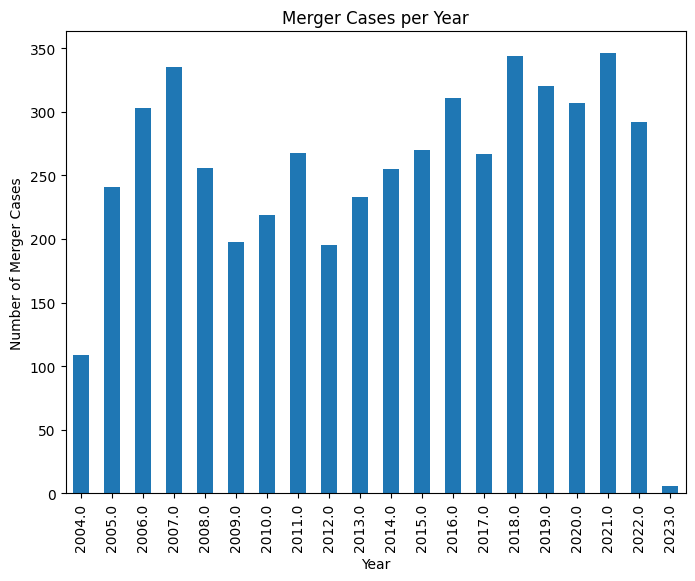

In [14]:
import matplotlib.pyplot as plt

# Group the DataFrame by year_text and count the number of unique case_num values
grouped = df.groupby('year_text')['case_num'].nunique()

# Create a bar chart of the grouped data
ax = grouped.plot(kind='bar', figsize=(8,6))

# Set the chart title and axis labels
ax.set_title('Merger Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Merger Cases')

# Display the chart
plt.show()


In [15]:
len(df[df['len_pdf']<=5])

3486

In [16]:
df[df['len_pdf']<=5]['case_num'].nunique()

3481

In [17]:
df[df['len_pdf']<=5]['file'].nunique()

3481

In [22]:
headings = df['section'].value_counts()

In [24]:
headings

No 139/20041                                                 489
1.  THE PARTIES                                              409
I.  THE PARTIES                                              278
3.  EU DIMENSION                                             259
PUBLIC VERSION                                               222
                                                            ... 
7.  ARTICLE 2(4) ASSESSMENT (POSSIBLE SPILL-OVER EFFECTS)      1
document number 32017M8486                                     1
3.2  Hearing protection                                        1
4  COMPETITIVE ASSESSMENT                                      1
5.2.  Market for (e-)bike sharing services                     1
Name: section, Length: 13921, dtype: int64

In [27]:
headings.head(10)

No 139/20041             489
1.  THE PARTIES          409
I.  THE PARTIES          278
3.  EU DIMENSION         259
PUBLIC VERSION           222
I. THE PARTIES           206
2.  THE OPERATION        176
3.  UNION DIMENSION      164
Area2                    134
2.  THE CONCENTRATION    131
Name: section, dtype: int64

In [74]:
df[df['section']=='Commission européenne, B-1049 Bruxelles / Europese Commissie, B-1049 Brussel - Belgium. Telephone: (32-2) 299 11 11.  II.  THE OPERATION'][['sec_text', 'count']]


,sec_text,count
3217,5. The transaction involves the acquisition b...,140
3934,4. The operation entails the acquisition of s...,39
4793,5. On 23/04/2007 Barclays announced its inten...,41
4815,5. The operation concerns the acquisition of ...,59
4932,"4. According to the ""Stock and Asset Sale Agr...",105
5371,5. Pursuant to a Memorandum of Understanding ...,49
5887,"4. On 13 May 2008, HP and MergerCo, a Delawar...",62
5934,5. The envisaged transaction concerns the acq...,102
6317,4. The Proposed Transaction concerns the acqu...,360
6376,4. According to a Sale and Purchase Agreement...,39
